<h1 align=center> <font size = 5> Exercise II</font></h1>

## Regresão linear 

Neste exercício, vamos modelar a relação linear entre o canto do grilo e a temperatura no solo. Para isso, serão usados os dados fornecidos por G. W. Pierce no livro "Songs of Insects" (1948). O objetivo é obter a função linear que melhor corresponda à tendência do número número de "cri-cris" que o grilo irá cantar a cada 15 segundos (Chirps) e a temperatura do solo (Temp), usando TensorFlow. 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

E:\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Obtendo os dados 

In [2]:
df = pd.read_csv("data/PierceCricketData.csv")
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


Text(0,0.5,'Temp (F)')

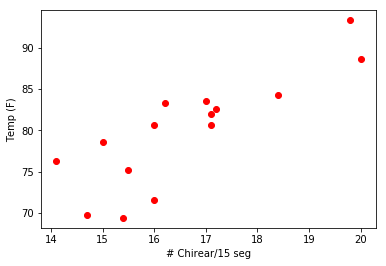

In [3]:
x_data, y_data = (df["Chirps"].values, df["Temp"].values)

# grafico com os dados
plt.plot(x_data, y_data, 'ro')
plt.xlabel("# Chirear/15 seg")
plt.ylabel("Temp (F)")

Observamos uma clara a relação linear entre o canto e a temperatura. Uma função linear que descreva essa relação é definida como: 

$Y_{pred} = m X + c$ 

Dado que temos os valores de X (o canto observado), precisamos estimar _m_ e _c_ para determinar a temperatura $Y_{pred}$. 

### Modelagem em Tensorflow

Vamos inicialmente observar algumas estimativas para valores arbitrários para _m_ e _c_, por exemplo, _m_ = 3 e _c_ = 2, usando Tensorflow. Para tanto, crie as constantes _m_ e _c_ e os _placeholders_ para a entrada _X_ (um vetor de dimensão x_data.size) e a temperatura _Y_ (um vetor de dimensão y_data.size). Finalmente, descreva a equação $Y_{pred}$:

In [6]:
# seu código aqui

m = tf.Variable(3.0)
c = tf.Variable(2.0)

X = tf.placeholder(tf.float32, shape=(x_data.size))
Y = tf.placeholder(tf.float32, shape=(x_data.size))

ypred = m*X+c

<div align="right">
<a href="#createvar" class="btn btn-default" data-toggle="collapse">Solução</a>
</div>
<div id="createvar" class="collapse">
```

X = tf.placeholder(tf.float32, shape=(x_data.size))
Y = tf.placeholder(tf.float32, shape=(y_data.size))

m = tf.Variable(3.0)
c = tf.Variable(2.0)

Ypred = X * m + c
```
</div>

###  Agora crie uma sessão do TF para obter Ypred

<h6>Obs:</h6> Fique à vontade para usar diferentes valores inicais para _m_ e _c_ e ver como eles mudam a estimativa.


In [ ]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [ ]:
# seu código aqui

<div align="right">
<a href="#matmul1" class="btn btn-default" data-toggle="collapse">Solução</a>
</div>
<div id="matmul1" class="collapse">
```

pred = session.run(Ypred, feed_dict={X:x_data})

#plot initial prediction against datapoints
plt.plot(x_data, pred)
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Cantos/15 seg")
plt.ylabel("Temp (F)")


```
</div>

### Estimando valores ótimos para _m_ e _c_

Para estimar _m_ e _c_ temos que minimizar a diferença entre a temperatura prevista $Y_{pred}$ e a real $Y$. Esta diferença pode ser calculada através da média do quadrado do erro (disponibilizada no TF como __tf.squared_difference__). 
      
$$ loss = \frac{1}{n}\sum_{i=1}^n{[\eta Ypred_i - \eta {Y}_i]^2} $$

onde $\eta = 0.1$ é um fator de normalização (usado neste caso porque os dados originalmente não foram normalizados).

In [ ]:
# seu código aqui

<div align="right">
<a href="#matmul12" class="btn btn-default" data-toggle="collapse">Solução</a>
</div>
<div id="matmul12" class="collapse">
```
# normalization factor
nf = 1e-1
# seting up the loss function
loss = tf.reduce_mean(tf.squared_difference(Ypred*nf,Y*nf))
```
</div>

### Use como algoritmo de otimização o gradiente descendente com taxa de aprendizado de 0.01 para minizar a sua função de perda

In [ ]:
# Your code goes here

<div align="right">
<a href="#matmul13" class="btn btn-default" data-toggle="collapse">Solução</a>
</div>
<div id="matmul13" class="collapse">
```
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.train.AdagradOptimizer(0.01 )

# pass the loss function that optimizer should optimize on.
train = optimizer.minimize(loss)

```
</div>

### Inicialize as variáveis novamente


In [ ]:
session.run(tf.global_variables_initializer())

###  Rode a sessão para treinar e prever os valores de _m_ e _c_ para diferentes passos de treino ao mesmo tempo que armazenando as perdas observadas em cada passo

Obtenha os valores previstos para _m_ e _c_ rodando a sessão para treinar o modelo linear. Também registre as perdas em diferentes passos para impressão e ploting.  

In [ ]:
convergenceTolerance = 0.0001
previous_m = np.inf
previous_c = np.inf
losses = []

for k in range(100000):
    ########## Seu código aqui ###########
    losses = losses + [_l]
    
    if (np.abs(previous_m - _m) or np.abs(previous_c - _c) ) <= convergenceTolerance:
        print "Terminado pelo critério de convergência: %d passos com perda %f"%(k, _l)
        break
    previous_m = _m, 
    previous_c = _c, 
    
session.close() 

<div align="right">
<a href="#matmul18" class="btn btn-default" data-toggle="collapse">Solução</a>
</div>
<div id="matmul18" class="collapse">
```
# run a session to train , get m and c values with loss function 
_, _m , _c,_l = session.run([train, m, c,loss],feed_dict={X:x_data,Y:y_data}) 

```
</div>

### Exibindo função de perda

In [ ]:
plt.plot(losses)

In [ ]:
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, _m*x_data + _c)

### Quais os valores de $m$ e $c$ encontrados?

In [1]:
# solucao aqui

<div align="right">
<a href="#mc" class="btn btn-default" data-toggle="collapse">Solução</a>
</div>
<div id="mc" class="collapse">
```
print previous_m, previous_c 

```
</div>

# Referência

http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm

Primeira parte do exercício proposta por <a href = "https://ca.linkedin.com/in/shashibushan-yenkanchi"> Shashibushan Yenkanchi </a> </h4>
